# Demo 1

### How to space out axes within a figure and methods to align colorbars

In [1]:
import matplotlib as mpl, matplotlib.pyplot as plt, numpy as np, pickle, cmyt

Data is prepared from a galaxy simulation snapshot (see demo-1-prep.ipynb if interested). For this demo, we will simply load in the data to plot.

In [2]:
with open("../data/vmap1.pkl",'rb') as f:
    vmap1 = pickle.load(f)
with open("../data/vmap2.pkl",'rb') as f:
    vmap2 = pickle.load(f)
with open("../data/radial_density.pkl",'rb') as f:
    rbins,dens = pickle.load(f)

We have two different kinds of data that we would like to plot: (1) projections of column density (images), and (2) a radial density profile (line plot). In order to combine these into a single matplotlib figure, we need to group the two projections while separating those two axes from the line plot axis. We do this by creating an additional "phantom" axis that we remove to artifically add spacing in the figure.

We then need to add a colorbar for the images which we align by taking the rendered positions of the axes.

Finally, we need to adjust the positions of the tick labels since the two image axes are so close together (we end up with overlapping labels). We manually specify the ticks to use and remove the last label for the first axis to prevent overlap.

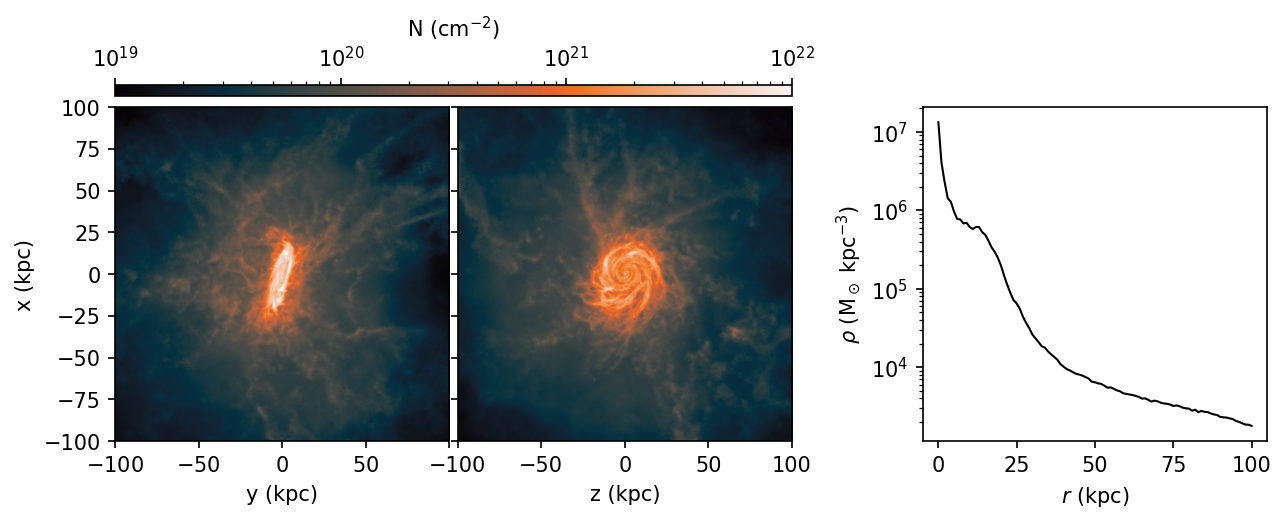

In [3]:
### Initialize the figure and axes with one extra axis to create space between the panels
axspace = 0.3
axpad = 0.03
aspect = 1.0/(3+axspace+3*axpad)
figw = 10
fig,axes = plt.subplots(1,4,figsize=(figw,figw*aspect),dpi=150,width_ratios=[1,1,axspace,1])
plt.subplots_adjust(wspace=axpad)

### Remove the extra axis to create a gap
axes[2].remove()
axes = axes[[0,1,3]]

### Align the two image axes
axes[0].set_anchor('E')
axes[1].set_anchor('W')

### Plot the data
extent = [[-100,100],[-100,100]]
vmin = 1e19; vmax = 1e22

ax = axes[0]
im = ax.imshow(vmap1, extent=np.ravel(extent), origin='lower', cmap='cmyt.dusk', norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),rasterized=True)
ax.set_aspect(1)
ax.set_ylabel("x (kpc)")
ax.set_xlabel("y (kpc)")

ax = axes[1]
im = ax.imshow(vmap2, extent=np.ravel(extent), origin='lower', cmap='cmyt.dusk', norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),rasterized=True)
ax.set_aspect(1)
ax.set_xlabel("z (kpc)")

ax = axes[-1]
ax.plot(rbins,dens,'k-',lw=1.0)
ax.set_ylabel(r"$\rho$ (M$_\odot$ kpc$^{-3}$)")
ax.set_xlabel(r"$r$ (kpc)")
ax.set_yscale('log')

### Colorbar
axp1 = axes[0].get_position(); axp2 = axes[1].get_position()
cax = fig.add_axes([axp1.x0,axp1.y1+0.025,axp2.x1-axp1.x0,0.025])
cbar = plt.colorbar(im,cax=cax,location='top',label='N (cm$^{-2}$)')

### Adjust the positions of the tick labels so that they don't overlap
axes[1].set_yticklabels([])
xtks = np.arange(extent[1][0],extent[1][1]+1,50)
axes[0].set_xticks(xtks)
axes[0].set_xticklabels(['${}$'.format(xtk) for xtk in xtks[:-1]]+[''])

plt.show()

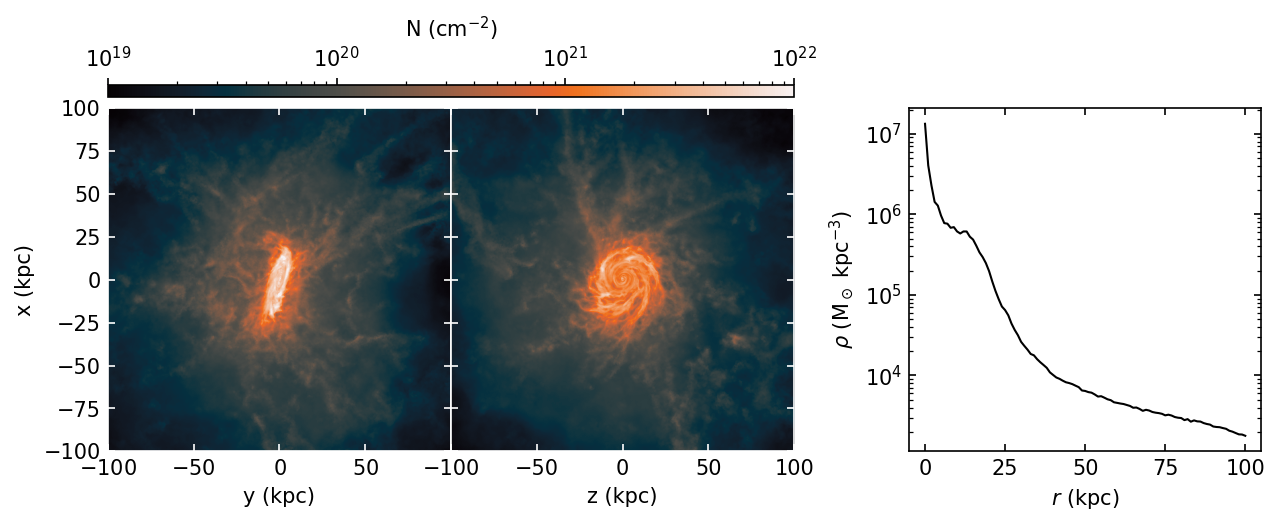

In [4]:
### Initialize the figure and axes with one extra axis to create space between the panels
axspace = 0.3
aspect = 1.0/(3+axspace)
figw = 10
fig,axes = plt.subplots(1,4,figsize=(figw,figw*aspect),dpi=150,width_ratios=[1,1,axspace,1])
plt.subplots_adjust(wspace=0.0)

### Remove the extra axis to create a gap
axes[2].remove()
axes = axes[[0,1,3]]

### Align the two image axes
axes[0].set_anchor('E')
axes[1].set_anchor('W')

### Plot the data
extent = [[-100,100],[-100,100]]
vmin = 1e19; vmax = 1e22

ax = axes[0]
im = ax.imshow(vmap1, extent=np.ravel(extent), origin='lower', cmap='cmyt.dusk', norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),rasterized=True)
ax.set_aspect(1)
ax.set_ylabel("x (kpc)")
ax.set_xlabel("y (kpc)")

ax = axes[1]
im = ax.imshow(vmap2, extent=np.ravel(extent), origin='lower', cmap='cmyt.dusk', norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),rasterized=True)
ax.set_aspect(1)
ax.set_xlabel("z (kpc)")

ax = axes[-1]
ax.plot(rbins,dens,'k-',lw=1.0)
ax.set_ylabel(r"$\rho$ (M$_\odot$ kpc$^{-3}$)")
ax.set_xlabel(r"$r$ (kpc)")
ax.set_yscale('log')

### Colorbar
axp1 = axes[0].get_position(); axp2 = axes[1].get_position()
cax = fig.add_axes([axp1.x0,axp1.y1+0.025,axp2.x1-axp1.x0,0.025])
cbar = plt.colorbar(im,cax=cax,location='top',label='N (cm$^{-2}$)')

### Adjust the positions of the tick labels so that they don't overlap
axes[1].set_yticklabels([])
xtks = np.arange(extent[1][0],extent[1][1]+1,50)
axes[0].set_xticks(xtks)
axes[0].set_xticklabels(['${}$'.format(xtk) for xtk in xtks[:-1]]+[''])

### Adjust the tick parameters to point in
for a in axes[[0,1]]:
    a.tick_params(which='both',tickdir='in',color='w',top=True,right=True)
    for spine in a.spines:
        a.spines[spine].set_color('w')
axes[-1].tick_params(which='both',tickdir='in',top=True,right=True)

plt.show()

The second example below is for a vertical layout. Much is the same except now we have the option to place the colorbar on either the side of the images or on top (using similar code to above in order to align it).

Additionally the tick label overlap is less severe so we can simply adjust the positions of the text elements by a few points and retain all the labels.

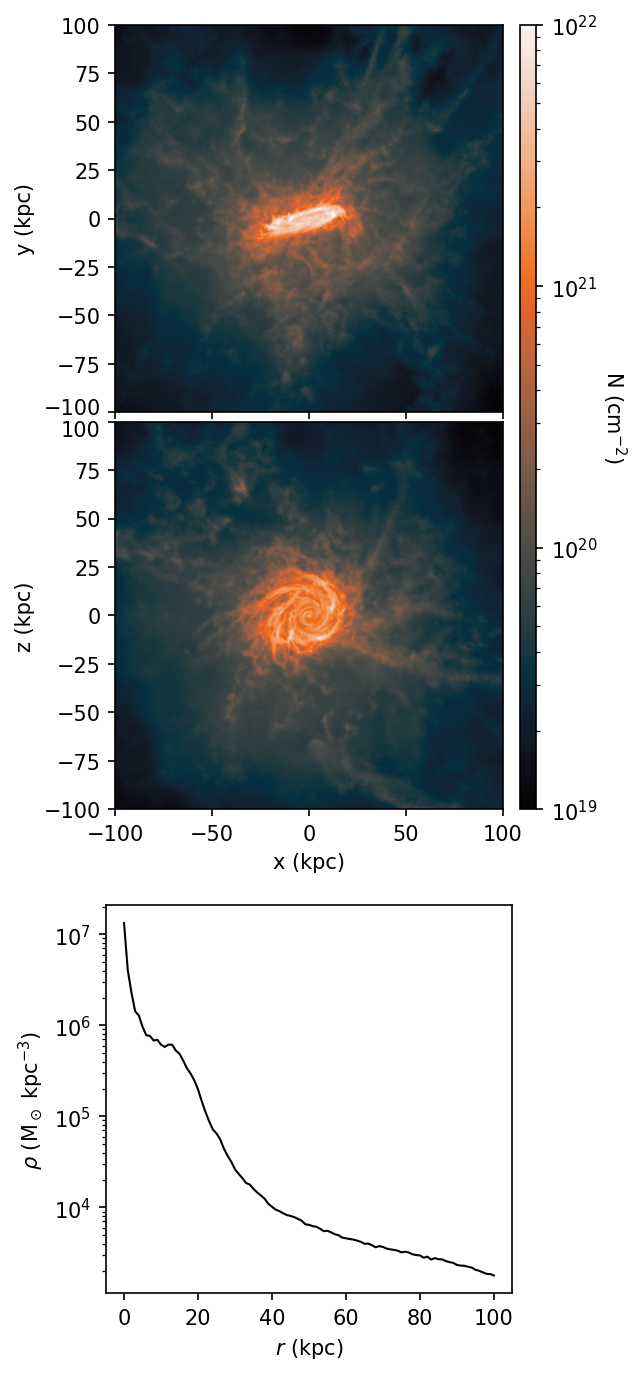

In [5]:
### Initialize the figure and axes with one extra axis to create space between the panels
axspace = 0.2
aspect = (3+axspace)
figw = 3.5
fig,axes = plt.subplots(4,1,figsize=(figw,figw*aspect),dpi=150,height_ratios=[1,1,axspace,1])
plt.subplots_adjust(hspace=0.03)

### Remove the extra axis to create a gap
axes[2].remove()
axes = axes[[0,1,3]]

### Align the two image axes
axes[0].set_anchor('S')
axes[1].set_anchor('N')

### Plot the data
pltrng = [[-100,100],[-100,100]]
vmin = 1e19; vmax = 1e22

ax = axes[0]
im = ax.imshow(vmap1.T, extent=np.ravel(extent), origin='lower', cmap='cmyt.dusk', norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),rasterized=True)
ax.set_aspect(1)
ax.set_ylabel("y (kpc)")

ax = axes[1]
im = ax.imshow(vmap2.T, extent=np.ravel(extent), origin='lower', cmap='cmyt.dusk', norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),rasterized=True)
ax.set_aspect(1)
ax.set_ylabel("z (kpc)")
ax.set_xlabel("x (kpc)")

ax = axes[-1]
ax.plot(rbins,dens,'k-',lw=1.0)
ax.set_ylabel(r"$\rho$ (M$_\odot$ kpc$^{-3}$)")
ax.set_xlabel(r"$r$ (kpc)")
ax.set_yscale('log')

### Colorbar
colorbarloc = 'side' # 'top'
if (colorbarloc == 'top'):
    axp = axes[0].get_position()
    cax = fig.add_axes([axp.x0,axp.y1+0.01,axp.x1-axp.x0,0.01])
    plt.colorbar(im,cax=cax,location='top',label='N (cm$^{-2}$)')
elif (colorbarloc == 'side'):
    axp1 = axes[1].get_position(); axp2 = axes[0].get_position()
    cax = fig.add_axes([axp1.x1+0.01*aspect,axp1.y0,0.01*aspect,axp2.y1-axp1.y0])
    cbar = plt.colorbar(im,cax=cax,location='right')
    cbar.set_label('N (cm$^{-2}$)',rotation=-90,labelpad=15)

### Adjust the positions of the tick labels so that they don't overlap
axes[0].set_xticklabels([])
dx = 0/72.; dy = 3/72. 
for i in range(2):
    offset = mpl.transforms.ScaledTranslation(dx, ([1,-1][i])*dy, fig.dpi_scale_trans)
    label = axes[i].yaxis.get_majorticklabels()[[0,-1][i]]
    label.set_transform(label.get_transform() + offset)



plt.show()